# Background 

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in. 







# Introduction to Recommendation systems

In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed. 

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.


What recommeder system can solve ?

1. It can help the user to find the right product.
2. It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3. It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4. It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.


# Types of recommendations

There are mainly 6 types of the recommendations systems :-

1. Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2. Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is     interested or not in the prodcut.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types:
 a) User-User 
 b) Item -Item
 
5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches . 
6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.



# Attribute Information:

● userId : Every user identified with a unique id 

● productId : Every product identified with a unique id 

● Rating : Rating of the corresponding product by the corresponding user 

● timestamp : Time of the rating ( ignore this column for this exercise)



# Import Libraries 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv


/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Load the Dataset and Add headers

In [2]:
electronics_data=pd.read_csv("/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv",names=['userId', 'productId','Rating','timestamp'])


In [3]:
# Display the data

electronics_data.head()


,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:

#Shape of the data
electronics_data.shape

(7824482, 4)

In [5]:
#Taking subset of the dataset
electronics_data=electronics_data.iloc[:1048576,0:]

In [6]:
#Check the datatypes
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [7]:
electronics_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
userId       1048576 non-null object
productId    1048576 non-null object
Rating       1048576 non-null float64
timestamp    1048576 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [8]:
#Five point summary 

electronics_data.describe()['Rating'].T


count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [9]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


The rating of the product range from 0 to 1

## Handling Missing values


In [10]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())



Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


## Ratings

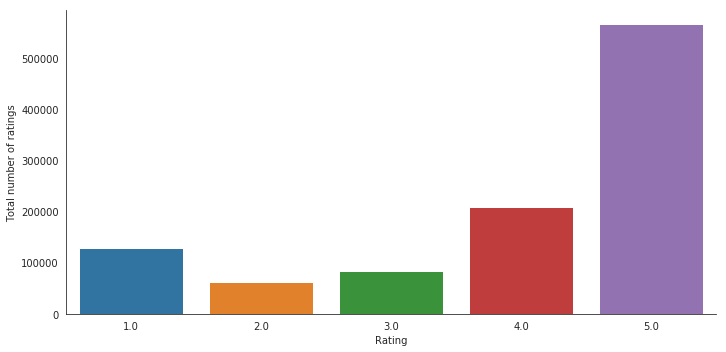

In [11]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=electronics_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

Most of the people has given the rating of 5

## Unique Users and products


In [12]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of products  :", len(np.unique(electronics_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


## Dropping the TimeStamp Column

In [13]:
#Dropping the Timestamp column

electronics_data.drop(['timestamp'], axis=1,inplace=True)

# Analyzing the rating

In [14]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

In [15]:
no_of_rated_products_per_user.describe()


count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: Rating, dtype: float64

In [16]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

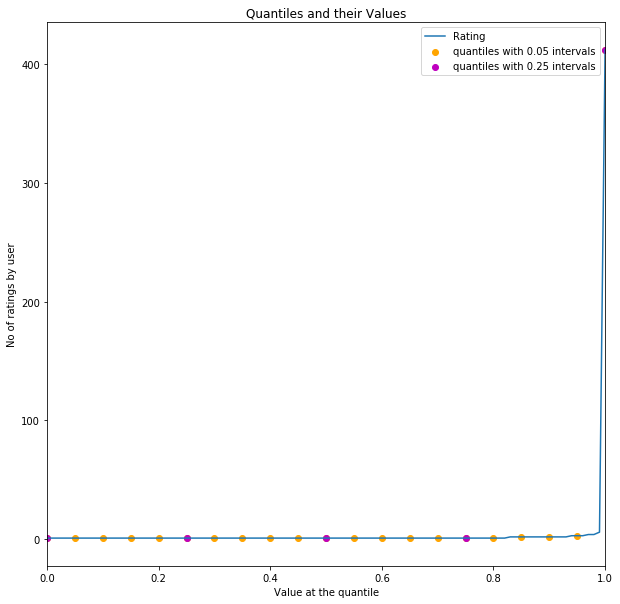

In [17]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [18]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )



 No of rated product more than 50 per user : 38



# Popularity Based Recommendation

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.



In [19]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[]

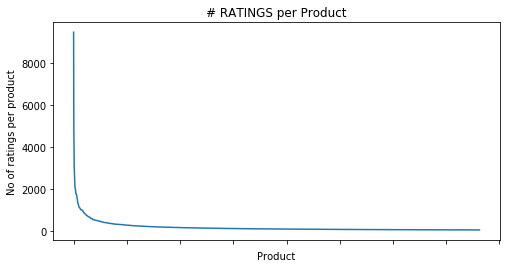

In [20]:
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [21]:
#Average rating of the product 

new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [22]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()


productId
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B000I1X3W8    4.869565
Name: Rating, dtype: float64

In [23]:
#Total no of rating for product

new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: Rating, dtype: int64

In [24]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())


In [25]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())


In [26]:
ratings_mean_count.head()


,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [27]:
ratings_mean_count['rating_counts'].max()


9487

<Figure size 576x432 with 0 Axes>

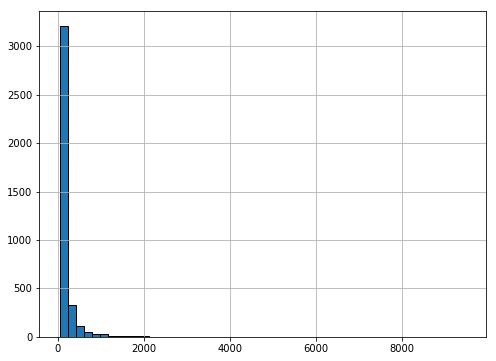

In [28]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

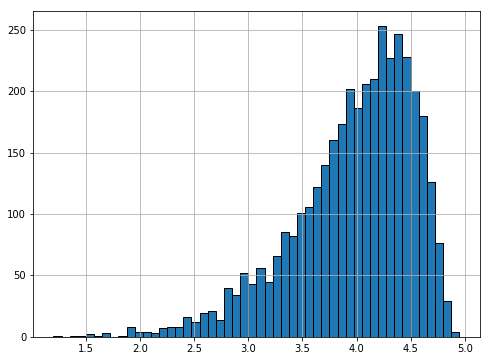

In [29]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

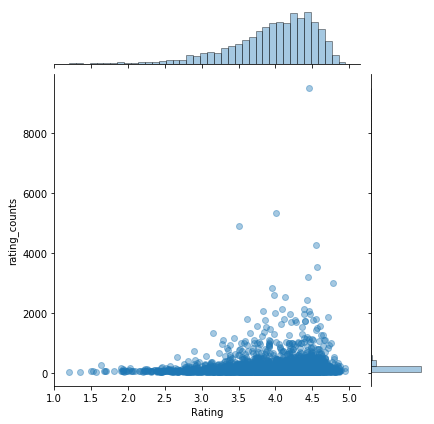

In [30]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

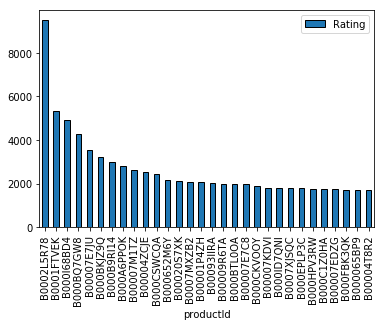

In [31]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

# Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach.
CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.



In [32]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [33]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [34]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [35]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [36]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [37]:
# test_pred
#

In [38]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3436


1.343641161111319

# Model-based collaborative filtering system

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [39]:

new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.



In [40]:
ratings_matrix.shape


(9832, 76)

Transposing the matrix

In [41]:
X = ratings_matrix.T
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X.shape


(76, 9832)

Unique products in subset of data


In [43]:
X1 = X


In [44]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [45]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [46]:
X.index[75]


'B00000K135'

Index # of product ID purchased by customer



In [47]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [48]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

Recommending top 25 highly correlated products in sequence



In [49]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['9985511476',
 'B000001OM4',
 'B00000J08Q',
 'B00000J0D8',
 'B00000J1SC',
 'B00000J1TX',
 'B00000J1V3',
 'B00000J3UJ',
 'B00000J4EY',
 'B00000JBAT',
 'B00000JBHP']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.


# Matrix Factorization with ALS (Alternating Least Squares)

In [50]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

new_df['user_id_encoded'] = user_encoder.fit_transform(new_df['userId'])
new_df['product_id_encoded'] = item_encoder.fit_transform(new_df['productId'])


In [51]:
from scipy.sparse import coo_matrix, csr_matrix
#  Convert to CSR
user_item_matrix = coo_matrix(
    (new_df['Rating'], (new_df['user_id_encoded'], new_df['product_id_encoded']))
).tocsr()

In [52]:
from implicit.als import AlternatingLeastSquares
#  Fit the ALS model (transpose here only!)
Als_model = AlternatingLeastSquares(factors=20, regularization=0.1, iterations=10)
Als_model.fit(user_item_matrix.T)  # item-user matrix (transposed)

In [53]:
# Pick a valid user index
test_user_index = new_df['user_id_encoded'].iloc[0]

# Recommend using original user_item_matrix (NOT TRANSPOSED)
recommendations = Als_model.recommend(test_user_index, user_item_matrix, N=5)

In [54]:
# Check recommendation output
print("Raw recommendations:", recommendations)

# Extract only valid indices
filtered = [item for item, score in recommendations if item < len(item_encoder.classes_)]
recommended_products = item_encoder.inverse_transform(filtered)

print("Top recommendations:", recommended_products)


Raw recommendations: [(3198, 0.23002364), (806, 0.18101333), (1156, 0.1776199), (2551, 0.1684143), (1799, 0.16747747)]
Top recommendations: ['B000EVSLRO' 'B00007M1TZ' 'B0000BVYTV' 'B000A6PPOK' 'B0002SQ2P2']


# Item-Item Collaborative Filtering


In [55]:
# Fit KNN model for item-item similarity
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(ratings_matrix)  # We use .T to transpose, so items are rows



NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [56]:
# View first few product IDs in the index
print(ratings_matrix.index[:10])


Index(['A01852072Z7B68UHLI5UG', 'A0266076X6KPZ6CCHGVS', 'A0293130VTX2ZXA70JQS',
       'A030530627MK66BD8V4LN', 'A0571176384K8RBNKGF8O',
       'A0590501PZ7HOWJKBGQ4', 'A0641581307AKT5MAOU0Q',
       'A076219533YHEV2LJO988', 'A0821988FXKFYX53V4QG',
       'A099626739FNCRNHIKBCG'],
      dtype='object', name='userId')


In [57]:
# Example: Recommend similar products to a given product
product_id = "A01852072Z7B68UHLI5UG"  # Example product ID

if product_id in ratings_matrix.index:
    product_vector = ratings_matrix.loc[product_id].values.reshape(1, -1)
    distances, indices = knn.kneighbors(product_vector, n_neighbors=6)  # include the product itself + 5 similar ones
    print("Recommended Product IDs:")
    for idx in indices.flatten()[1:]:  # skip the first one (it will be the product itself)
        print(ratings_matrix.index[idx])
else:
    print(f"Product ID {product_id} not found in ratings matrix.")

Recommended Product IDs:
AEKRUPH3CRAS1
A3CX02IGUE2FV9
AONK23UMJ07Y7
A1BRRHSNSYDV9J
A35P6RIPEEEIB5


# Neural Collaborative Filtering (NCF)



In [58]:
# Assume new_df is already defined
df = new_df.copy()

# Label encoding
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
df['user'] = user_encoder.fit_transform(df['userId'])
df['item'] = item_encoder.fit_transform(df['productId'])

num_users = df['user'].nunique()
num_items = df['item'].nunique()



In [59]:
# Inputs
user_input_data = df['user'].values
item_input_data = df['item'].values
ratings_data = df['Rating'].values.astype(np.float32)



In [60]:
# Stack features
X = np.stack((user_input_data, item_input_data), axis=1)
y = ratings_data

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [83]:
# Separate user and item inputs for training and testing
X_train_u = X_train[:, 0]
X_train_i = X_train[:, 1]
X_test_u = X_test[:, 0]
X_test_i = X_test[:, 1]

In [65]:
from tensorflow.keras.layers import Input, Embedding, Flatten
embedding_size = 50  # hyperparameter

# User input
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, name='user_embedding')(user_input)
user_vec = Flatten()(user_embedding)

# Item input
item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, name='item_embedding')(item_input)
item_vec = Flatten()(item_embedding)

In [67]:
from tensorflow.keras.layers import Concatenate
# Embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, name='item_embedding')(item_input)

# Flatten layers
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Concatenate user and item embeddings
concat = Concatenate()([user_vec, item_vec])  

In [70]:
from tensorflow.keras.layers import  Dense, Dropout
# Fully connected layers
fc1 = Dense(128, activation='relu')(concat)
drop1 = Dropout(0.5)(fc1)
fc2 = Dense(64, activation='relu')(drop1)
fc3 = Dense(32, activation='relu')(fc2)
output = Dense(1, activation='linear')(fc3)



In [86]:
from tensorflow.keras.models import Model
# Build and compile model
NCF_model = Model(inputs=[user_input, item_input], outputs=output)


In [87]:
import tensorflow.keras.backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))
    
NCF_model.compile(optimizer='adam', loss='mse', metrics=[rmse])


NCF_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        27645450    user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 50)        190650      item_input[0][0]                 
____________________________________________________________________________________________

In [89]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = NCF_model.fit(
    [X_train_u, X_train_i],
    y_train,
    validation_data=([X_test_u, X_test_i], y_test),
    epochs=10,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)


Train on 542357 samples, validate on 135590 samples
Epoch 1/10
542357/542357 [==============================] - 350s 646us/sample - loss: 1.2615 - rmse: 1.1222 - val_loss: 1.7979 - val_rmse: 1.3400
Epoch 2/10
542357/542357 [==============================] - 348s 642us/sample - loss: 0.6450 - rmse: 0.8018 - val_loss: 1.8066 - val_rmse: 1.3433
Epoch 3/10
542357/542357 [==============================] - 348s 642us/sample - loss: 0.3785 - rmse: 0.6136 - val_loss: 1.7957 - val_rmse: 1.3393
Epoch 4/10
542357/542357 [==============================] - 348s 641us/sample - loss: 0.2814 - rmse: 0.5289 - val_loss: 1.8347 - val_rmse: 1.3539
Epoch 5/10
542357/542357 [==============================] - 349s 644us/sample - loss: 0.2190 - rmse: 0.4663 - val_loss: 1.8429 - val_rmse: 1.3569
Epoch 6/10
542357/542357 [==============================] - 350s 645us/sample - loss: 0.1872 - rmse: 0.4309 - val_loss: 1.8662 - val_rmse: 1.3655


<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Training vs Validation MSE')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'MSE')

Text(0.5, 1.0, 'Training vs Validation RMSE')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'RMSE')

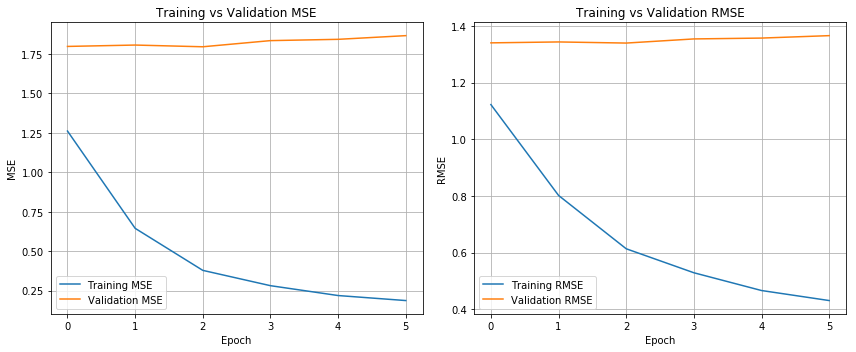

In [91]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Training vs Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.title('Training vs Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [94]:
# Example: Predict rating for user ID 55 and item ID 1000
user_id = 55
item_id = 1000

user_input = np.array([[user_id]])
item_input = np.array([[item_id]])

predicted_rating = NCF_model.predict([user_input, item_input], verbose=0)

print("Predicted rating (0–5 scale):", predicted_rating[0][0])


Predicted rating (0–5 scale): 4.871537


# Hybrid Model (Combining ALS, KNN, and NCF)

In [100]:
user_id = 5
item_id = 100

In [117]:
# ---------- NCF Prediction ----------
user_input = np.array([[user_id]])
item_input = np.array([[item_id]])
ncf_pred = NCF_model.predict([user_input, item_input], verbose=0)
print("Predicted rating (0–5 scale):", predicted_rating[0][0])

Predicted rating (0–5 scale): 4.8252068


In [114]:
user_id_encoded = 5 
item_id_encoded = 100

# Make sure the user and item indices are valid
if user_id_encoded < Als_model.user_factors.shape[0] and item_id_encoded < Als_model.item_factors.shape[0]:
    als_pred = Als_model.user_factors[user_id_encoded].dot(Als_model.item_factors[item_id_encoded])
    print("ALS Prediction:", round(als_pred, 4))
else:
    print("User or item index is out of bounds.")


ALS Prediction: 0.0


In [115]:
from sklearn.preprocessing import MinMaxScaler

# Get all ALS scores (user × item matrix)
als_all_scores = Als_model.user_factors @ Als_model.item_factors.T

# Scale ALS scores to 0–5
scaler = MinMaxScaler(feature_range=(0, 5))
als_scaled_scores = scaler.fit_transform(als_all_scores)

# Fetch the scaled ALS prediction
als_pred_scaled = als_scaled_scores[user_id_encoded, item_id_encoded]
print("ALS Prediction (scaled 0–5):", round(als_pred_scaled, 2))


ALS Prediction (scaled 0–5): 0.34


In [109]:

# Use Surprise model's test method (if needed, recreate trainset/testset)
knn_pred = algo.predict(user_id, item_id).est


In [108]:
print("KNN Prediction (0–5 scale):", round(knn_pred, 2))


KNN Prediction (0–5 scale): 4.05


In [118]:
# Example weights (you can tune these)
w_ncf = 0.5
w_als = 0.2
w_knn = 0.3

# Compute weighted hybrid prediction
hybrid_pred = (w_ncf * ncf_pred) + (w_als * als_pred_scaled) + (w_knn * knn_pred)

In [120]:
print("Weighted Hybrid Prediction (0–5 scale):", round(float(hybrid_pred), 2))


Weighted Hybrid Prediction (0–5 scale): 3.7


In [125]:
# --- NCF Predictions ---
ncf_preds = NCF_model.predict([X_test_u, X_test_i], verbose=0).flatten()

# --- ALS Predictions ---
als_preds = []
for u, i in zip(X_test_u, X_test_i):
    if u < Als_model.user_factors.shape[0] and i < Als_model.item_factors.shape[0]:
        pred = Als_model.user_factors[u].dot(Als_model.item_factors[i])
    else:
        pred = 0  # Or mean rating as fallback
    als_preds.append(pred)
als_preds = np.array(als_preds)

# --- KNN Predictions ---
knn_preds = []
for u, i in zip(X_test_u, X_test_i):
    knn_preds.append(algo.predict(int(u), int(i)).est)
knn_preds = np.array(knn_preds)

# --- Hybrid Predictions (simple average example) ---
hybrid_preds = (ncf_preds + als_preds + knn_preds) / 3


In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(name, y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} RMSE: {rmse:.4f}, MAE: {mae:.4f}")

evaluate_model("NCF", y_test, ncf_preds)
evaluate_model("ALS", y_test, als_preds)
evaluate_model("KNN", y_test, knn_preds)
evaluate_model("Hybrid", y_test, hybrid_preds)


NCF RMSE: 1.7957, MAE: 1.0654
ALS RMSE: 17.1529, MAE: 3.9204
KNN RMSE: 1.8295, MAE: 1.0682
Hybrid RMSE: 3.5277, MAE: 1.7533
